<a href="https://colab.research.google.com/github/OfficerChul/learnPyTorch/blob/main/01_pytorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow.
Resources:
- https://www.learnpytorch.io/01_pytorch_workflow/
- https://youtu.be/V_xro1bcAuA?si=Ic09cftXr2ctJvzy


In [ ]:
what_were_covering = {
    1: 'data (prepare and load)',
    2: 'build model',
    3: 'fitting the model to data (training)',
    4: 'making predictions and evaluating the model (inference)',
    5: 'saving and loading a model',
    6: 'putting it all together'
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating the model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch building blocks for neural networks
import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__

'2.1.0+cu121'

# 1. Data (preparing and loading)

Machine Learning is a game of two parts:
1. turn your data into a representative set of numbers
2. Pick or build a model to learn the representation as best as possible

We will use **linear regression** to create the data with known parameters (things that can be learned by a model) and then we will use PyTorch to see if we can build model to estimate these parameters using **gradient descent**.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## 1. Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [ ]:
## Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train)

(40, 40)

How might we better visualize our data?

This is where the data explorer's motto comes in!

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  if predictions != None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  plt.legend(prop={'size': 14})

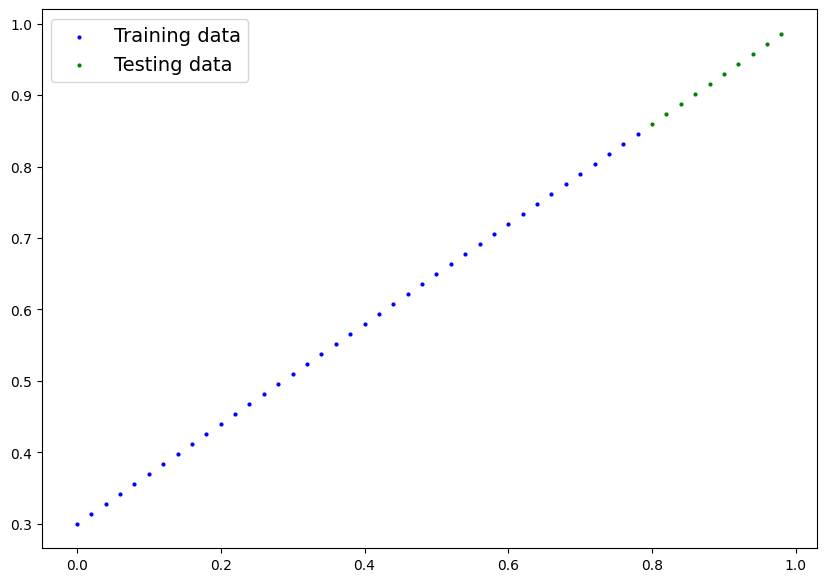

In [ ]:
plot_predictions()

## 2. Build model

Out first model!

What out model does:
1. Start with random values (weight & bias)
2. Look at training data and adjust random values to better represent (or get closer to) the idea values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [ ]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is the input data
    return self.weights * x + self.bias # linear regression formula


### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs (a neural network that can be considered as conputational graph)
* torch.nn.Parameter - what parameters should out model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overrride forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

### CHekcing the contents of our PyTorch model

Now we've created a model, let's see what's inside

So we can check our model parameters or what's inside our model using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
print(list(model_0.parameters()))

# List named parameters
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


### Making prediction using `torch.inference_mode()`

To check out model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions with model
with torch.inference_mode(): # <- improve the performance (inference speed) by turning off gradient feature
  y_preds = model_0(X_test)

# Inference_mode is preferred than `no_grad()`
# with torch.no_grad():
#   y_preds_t = model_0(X_test)

print(y_preds)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


See more information about inference here - https://twitter.com/PyTorch/status/1437838231505096708?lang=en

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

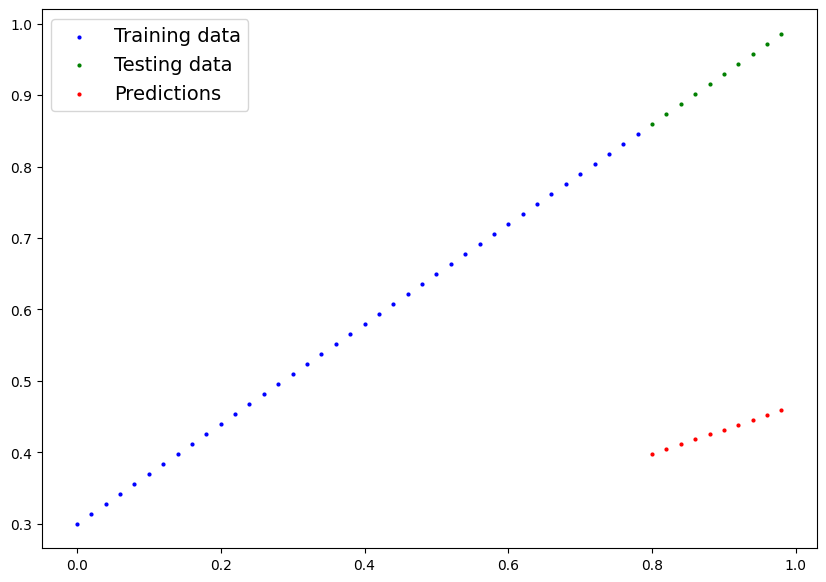

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unkown* parameters (these may b erandom) to some *known* parameters

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

- Note: Loss function may also be called cost function or criterion in differnt areas. For our case, we're going to refer to it as a loss function.

THings we need to train:

- **Loss function:** A function to measure how wrong your model's predictions are to the idea outputs, lower is better.
- **Optimizer:** Tkes into acocunt the loss of a model and adjusts the model's parameters (e.g., weight & bias) to improve the loss function.

And specifically for PyTorch, we need:
- A training loop
- A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out model's parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
loss_fn

L1Loss()

### Building a training loop in PyTorch

A couple of things we need in training loop:
0. Loop through the data
1. Forward Pass (this involves data moving through our mode;s `forward()` functions) - also called **forward propagation**
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**back propagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
with torch.no_grad():
  list(model_0.parameters())

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
with torch.inference_mode():
  list(model_0.parameters())

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200
train_losses = []
test_losses = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradient

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f'Loss: {loss}')

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different setting in the model not neded for evaluation/testing (dropout / batchnorm)
  with torch.inference_mode() :# turns of gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  train_losses.append(loss)
  test_losses.append(test_loss)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')
    print(model_0.state_dict())
    print()

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])

Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])

Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])

Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])

Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])

Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([

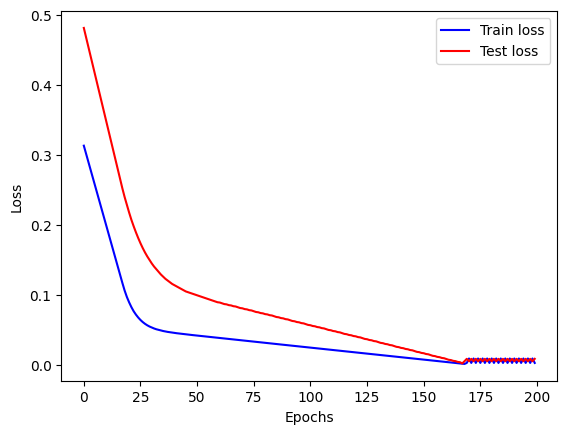

In [ ]:
plt.plot(torch.tensor(train_losses).detach().numpy(), c='b', label='Train loss')
plt.plot(test_losses, c='r', label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

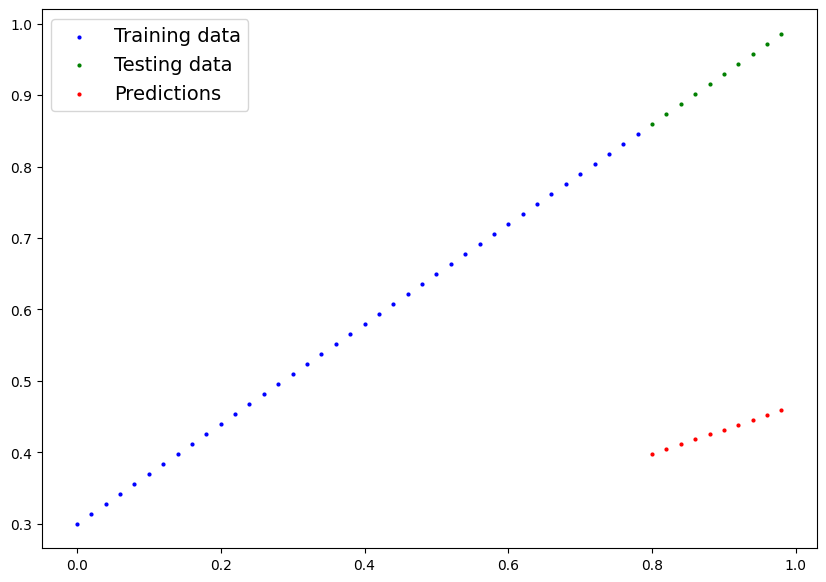

In [ ]:
plot_predictions(predictions=y_preds)

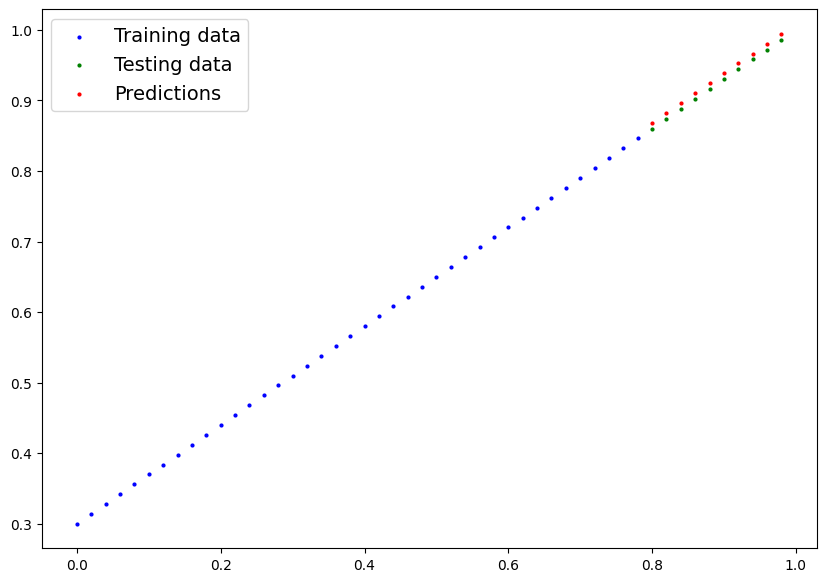

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should abouut for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to laod a model's saved stated dictionary

In [ ]:
# Saving our Pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pt


In [ ]:
!ls -l model

ls: cannot access 'model': No such file or directory


## Loading a PyTorch model
Since we saved our mode, rather than the entire model, we'll create a new instance of our model class and load the saved `stated_dict()` into that

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
torch.load(f=MODEL_SAVE_PATH)

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
weight = 0.7
bias = 0.3
X = torch.arange(0, 1, 0.02)
print(X)
print(X.unsqueeze(dim=1)[:10])
X = X.unsqueeze(dim=1)

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])


In [ ]:
y = weight * X + bias
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [ ]:
# Split data
train_num = int(0.8 * len(X))
X_train, y_train = X[:train_num], y[:train_num]
X_test, y_test = X[train_num:], y[train_num:]

print(len(X_train), len(X_test), len(X))

40 10 50


In [ ]:
def plot_predictions(pred=None):
  plt.scatter(X_train.cpu(), y_train.cpu(), s=4, c='b', label='training set')
  plt.scatter(X_test.cpu(), y_test.cpu(), s=4, c='g', label='testing set')
  if pred is not None:
    plt.scatter(X_test.cpu(), pred.cpu().detach().numpy(), s=4, c='r', label='prediction')
  plt.legend(prop={'size': 14})

In [ ]:
torch.manual_seed(42)
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)
print(loss_fn, optimizer)

L1Loss() SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [ ]:
print(next(model_1.parameters()).device)
model_1.to(device)
print(next(model_1.parameters()).device)

cpu
cuda:0


In [ ]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)
train_losses, test_losses = [], []

for epoch in range(epochs):
  model_1.train()

  y_preds = model_1(X_train)

  train_loss = loss_fn(y_preds, y_train)
  train_losses.append(train_loss)

  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()

  ## Testing

  model_1.eval()
  with torch.inference_mode():
    y_preds = model_1(X_test)
    test_loss = loss_fn(y_preds, y_test)
    test_losses.append(test_loss)

  if epoch % 100 == 0:
    print(f'Epochs: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}')

Epochs: 0 | Train Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epochs: 100 | Train Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epochs: 200 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epochs: 300 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epochs: 400 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epochs: 500 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epochs: 600 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epochs: 700 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epochs: 800 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epochs: 900 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882


In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds = y_preds.cpu()
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

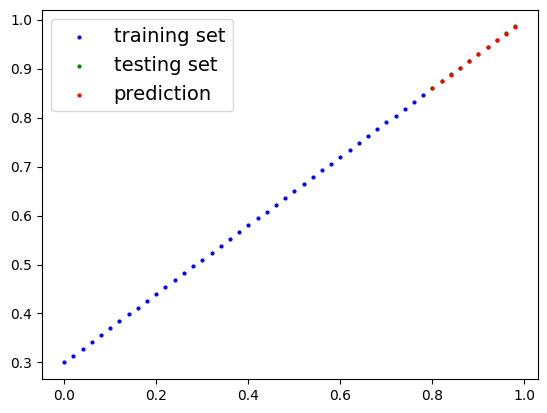

In [ ]:
plot_predictions(y_preds)

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
# Instantiate a fresh instance of LinearRegressionModel
loaded_model_1 = LinearRegressionModel()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)
print(loaded_model_1.state_dict())
print(model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])


In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  y_preds_new = loaded_model_1(X_test)

print(y_preds_new == y_preds.to(device))

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')
